In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('/kaggle/input/exam-and-grant-data-of-erasmus-applicants/erasmus.csv')
df.head()

,INDEX,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [3]:
df.isnull().sum()

INDEX           0
COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         341 non-null    int64  
 1   COUNTRIES     341 non-null    object 
 2   UNIVERSITIES  341 non-null    object 
 3   FACULTIES     341 non-null    object 
 4   DEPARTMENTS   339 non-null    object 
 5   EXAM SCORE    341 non-null    float64
 6   GRANT         341 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


In [5]:
df.dropna(inplace = True)

In [6]:
df.duplicated().sum()

0

In [8]:
# Check columns and their data types
for column_name in df.columns:
    column_type = df[column_name].dtype
    print(f'Column Name: -> {column_name} | Type: -> {column_type}')

Column Name: -> INDEX | Type: -> int64
Column Name: -> COUNTRIES | Type: -> object
Column Name: -> UNIVERSITIES | Type: -> object
Column Name: -> FACULTIES | Type: -> object
Column Name: -> DEPARTMENTS | Type: -> object
Column Name: -> EXAM SCORE | Type: -> float64
Column Name: -> GRANT | Type: -> int64


In [9]:
# Change Columns Name
new_columns_name = []
for column in df.columns:
    new_columns_name.append(column.capitalize())

df.columns = new_columns_name
df.head()

,Index,Countries,Universities,Faculties,Departments,Exam score,Grant
0,1,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,2,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,3,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,4,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,5,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [10]:
df.drop(columns = ["Index"], inplace = True)

In [11]:
df['Grant'].value_counts()

Grant
0    191
1    148
Name: count, dtype: int64

In [12]:
df["Countries"] = df["Countries"].apply(lambda x: x.capitalize())

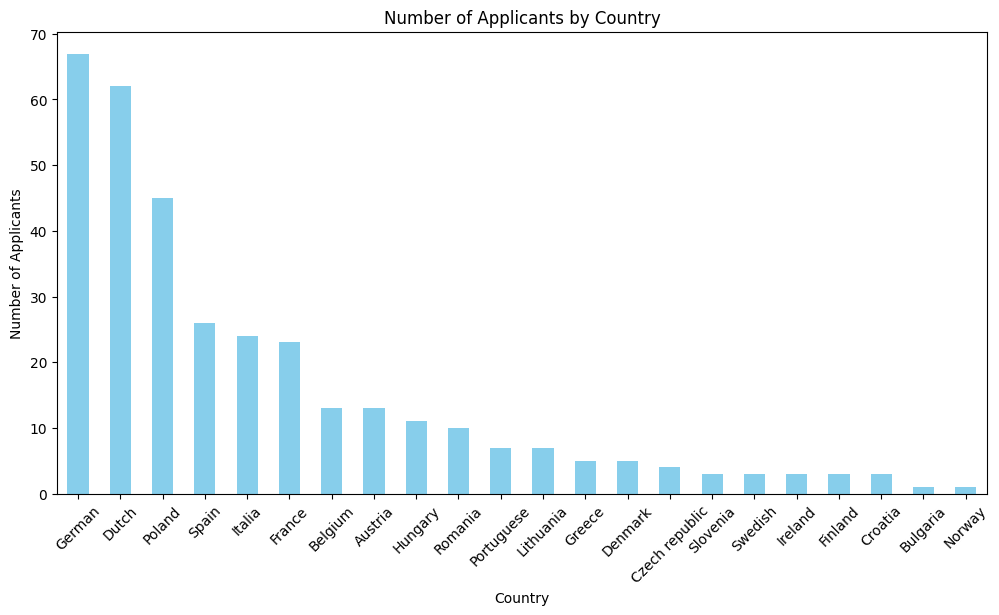

In [13]:
plt.figure(figsize=(12, 6))
df['Countries'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Applicants by Country')
plt.xlabel('Country')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

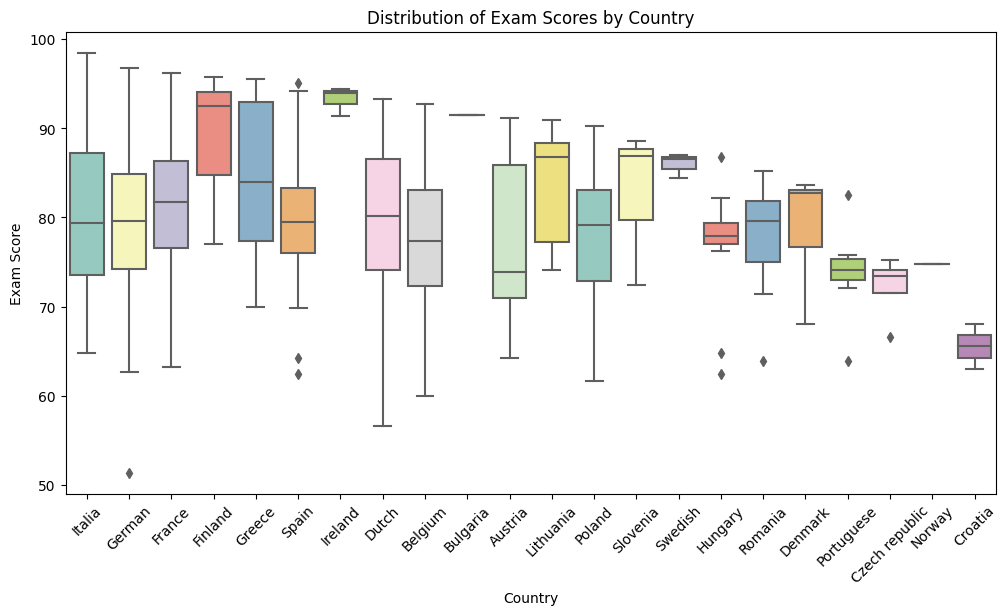

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Countries', y='Exam score', data=df, palette='Set3')
plt.title('Distribution of Exam Scores by Country')
plt.xlabel('Country')
plt.ylabel('Exam Score')
plt.xticks(rotation=45)
plt.show()

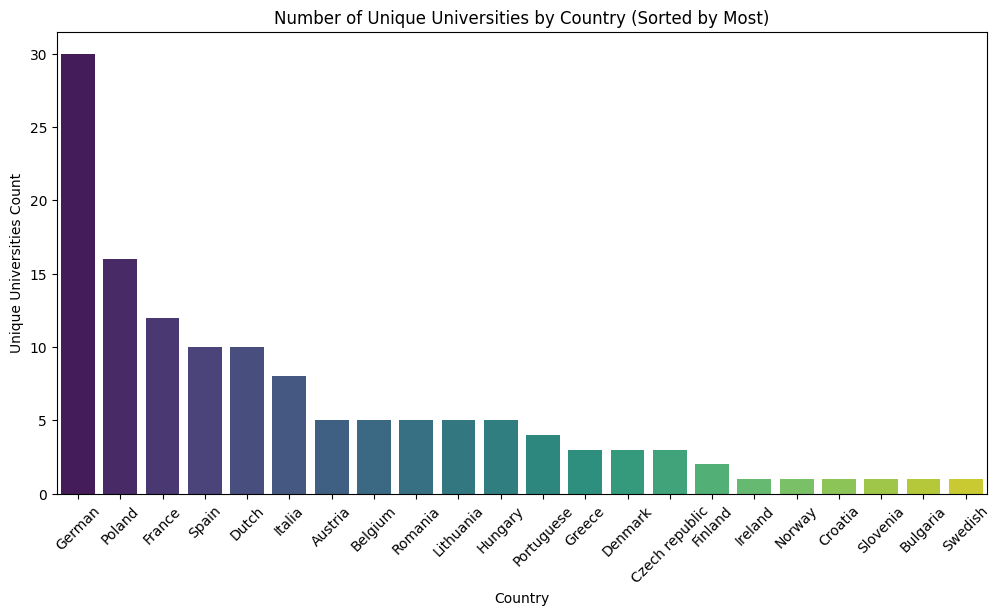

In [15]:
uni_counts_by_country = df.groupby('Countries')['Universities'].nunique().reset_index()
uni_counts_by_country_sorted = uni_counts_by_country.sort_values(by='Universities', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Countries', y='Universities', data=uni_counts_by_country_sorted, palette='viridis')
plt.title('Number of Unique Universities by Country (Sorted by Most)')
plt.xlabel('Country')
plt.ylabel('Unique Universities Count')
plt.xticks(rotation=45)
plt.show()

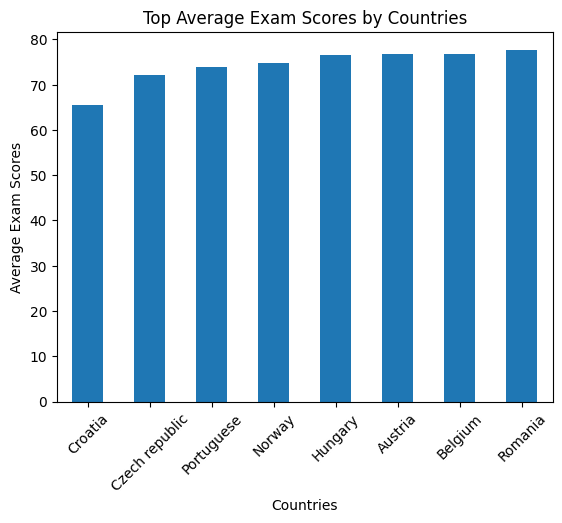

In [16]:
df.groupby('Countries')['Exam score'].mean().sort_values(ascending=True).head(8).plot(kind="bar")
plt.ylabel("Average Exam Scores")
plt.title("Top Average Exam Scores by Countries")
plt.xticks(rotation=45)
plt.show()

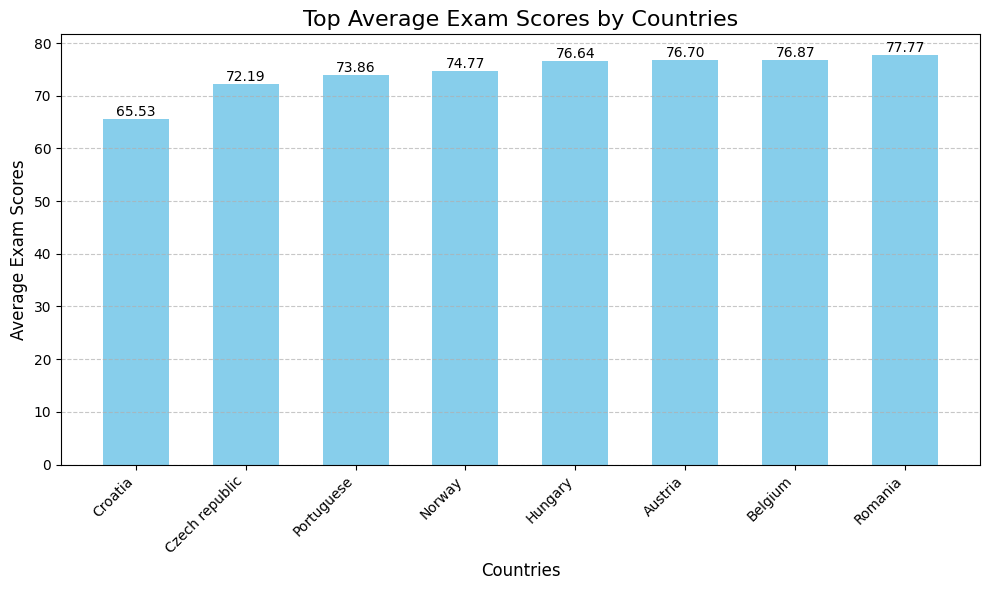

In [17]:
top_countries = df.groupby('Countries')['Exam score'].mean().sort_values(ascending=True).head(8)

plt.figure(figsize=(10, 6))  # Set the figure size
colors = plt.cm.viridis(top_countries.values / max(top_countries.values))  # Use a custom color palette

bars = plt.bar(top_countries.index, top_countries.values, color='skyblue',width=0.6)
# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.ylabel("Average Exam Scores", fontsize=12)
plt.xlabel("Countries", fontsize=12)
plt.title("Top Average Exam Scores by Countries", fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

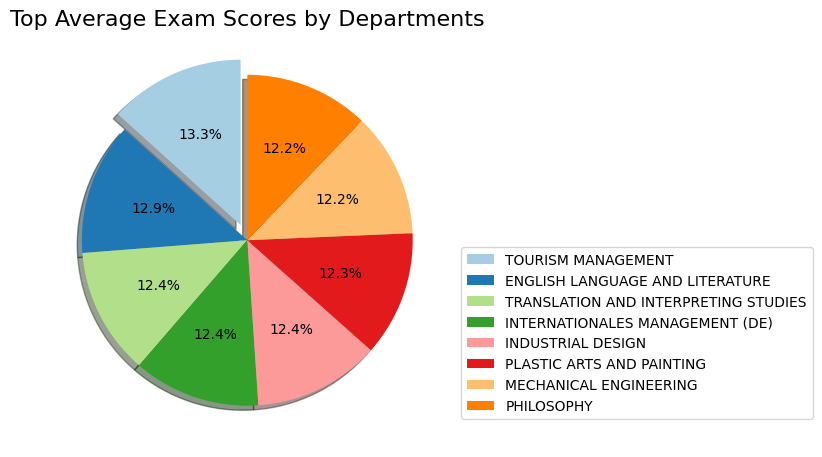

In [18]:
top_departments = df.groupby('Departments')['Exam score'].mean().sort_values(ascending=False).head(8)

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # "Explode" the first slice (optional)
colors = plt.cm.Paired.colors  # Use a custom color palette

top_departments.plot(
    kind="pie",
    autopct='%1.1f%%',  # Display percentages on the slices
    startangle=90,       # Rotate the pie chart for better alignment
    shadow=True,         # Add a shadow effect
    explode=explode,     # Explode slices (optional)
    colors=colors,       # Use custom colors
    labels=None,         # Remove default labels (we'll add a legend instead)
)
plt.title("Top Average Exam Scores by Departments", fontsize=16)
plt.xlabel("")
plt.ylabel("")

plt.legend(labels=top_departments.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [19]:
X = df[['Countries', 'Departments', 'Exam score']]  # Feature matrix (DataFrame)
y = df['Grant']  # Target variable (Series)

# Encode categorical columns in X using .loc to avoid SettingWithCopyWarning
labelencoder = LabelEncoder()
X.loc[:, 'Countries'] = labelencoder.fit_transform(X['Countries'])
X.loc[:, 'Departments'] = labelencoder.fit_transform(X['Departments'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the encoded feature matrix
print(X_train.head())

    Countries Departments  Exam score
66         14           9       86.78
114         1           8       83.05
7          10          12       95.52
137         8           7       81.73
330         3          25       62.97


In [20]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.8824
Decision Tree Accuracy: 0.8529
Random Forest Accuracy: 0.8676
SVM Accuracy: 0.8971
K-Nearest Neighbors Accuracy: 0.8382


In [21]:
# Define the algorithms and their hyperparameter grids
pipelines = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__solver': ['liblinear', 'lbfgs']
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }
    }
}

# Perform GridSearchCV for each algorithm
best_models = {}
for algo, config in pipelines.items():
    print(f'Training {algo}...')
    pipe = Pipeline([('model', config['model'])])
    grid_search = GridSearchCV(pipe, config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its accuracy
    best_models[algo] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    
    # Save the best model using joblib
    joblib.dump(grid_search.best_estimator_, f'{algo}_best_model.pkl')
    print(f'Saved {algo}_best_model.pkl')

# Evaluate the best models on the test set
for algo, model_info in best_models.items():
    y_pred = model_info['model'].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{algo} - Test Accuracy: {accuracy:.4f}')
    print(f'Best Parameters: {model_info["best_params"]}')
    print(f'Best Cross-Validation Score: {model_info["best_score"]:.4f}')
    print('---')

Training RandomForest...
Saved RandomForest_best_model.pkl
Training LogisticRegression...
Saved LogisticRegression_best_model.pkl
Training SVM...
Saved SVM_best_model.pkl
Training KNN...
Saved KNN_best_model.pkl
RandomForest - Test Accuracy: 0.8676
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Cross-Validation Score: 0.8820
---
LogisticRegression - Test Accuracy: 0.8824
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Best Cross-Validation Score: 0.8708
---
SVM - Test Accuracy: 0.8971
Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}
Best Cross-Validation Score: 0.8820
---
KNN - Test Accuracy: 0.8382
Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'uniform'}
Best Cross-Validation Score: 0.8560
---
